# Титаник

### Класификация, разглеждане на данни (data exploration), инженерство на характеристики (feature engineering)

Днес:

* Ще разгледаме един от култовите dataset-и в Kaggle: titanic
* Ще пробваме няколко класификационни алгоритми
* Ще ровим в данните и ще измислим няколко характеристики, за да подобрим модела

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import mglearn

from IPython.display import display

%matplotlib inline

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Titanic



Може да изтеглите оттук: https://www.kaggle.com/c/titanic и да ги добавите в `data/titanic/`.

Данните съдържат историческата информация за пътниците (възраст, пол, име, т.н.) на кораба, както и етикети дали са оцелели.

Отговаряме на класификационнен въпрос. Именно:

Кой от тези двамата ще умре?

Да започнем със зареждане на данните. Ползваме `pandas`.

Първо, ще ограничим колко реда се показват до 15 (за да се събират в слайдовете):

In [3]:
pd.options.display.max_rows = 15

След това зареждаме данните:

In [4]:
pd.read_csv('data/titanic/train.csv')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


`PassengerId` изглежда като иднекс, който няма да ни даде нищо интересно. Може да отрежем колоната, но pandas има трик за целта:

In [5]:
original = pd.read_csv('data/titanic/train.csv', index_col='PassengerId')
original

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


Какво ли значат тези данни? Може да видим в Kaggle:

| Variable | Definition                                 | Key                                            |
|:---------|:-------------------------------------------|:-----------------------------------------------|
| Survived | Survival                                   | 0 = No, 1 = Yes                                |
| Pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| Sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| SibSp    | # of siblings / spouses aboard the Titanic |                                                |
| Parch    | # of parents / children aboard the Titanic |                                                |
| Ticket   | Ticket number                              |                                                |
| Fare     | Passenger fare                             |                                                |
| Cabin    | Cabin number                               |                                                |
| Embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |


Да видим малко статистика:

In [6]:
original.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Забелязва се, че не всички колони имат стойности - например Age. Нека да видим какво е положението при другите:

In [7]:
original.isnull().sum().sort_values()

Survived      0
Pclass        0
Name          0
Sex           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
Age         177
Cabin       687
dtype: int64

Трябва да решим този проблем. Анализът ни на трите колони е следния:

* Липсват само две `Embarked` – може да ги попълним както си искаме, няма да има голямо значение.
* Повечето `Cabin` липсват – едва ли може да извлечем интересна информация от там (ако не се постараем твърде много) и може да игнорираме колоната
* `Age` вече е проблем – трябва да изберем какво да направим.

## Обработка на Age

Опциите ни са:

1. Да разкараме редовете
2. Да попълним с нули
3. Да попълним със средната стойност на колоната
4. Да направим някаква магия

1 не е опция, понеже ще загубим около 20% от данните. Dataset-а е малък. 2 също не е най-доброто решение, понеже ще измести данните твърде много в една посока. Понеже още не сме магьосници, ще почнем с 3.

In [8]:
data = original.copy()
data['Age'] = data.Age.fillna(data.Age.mean())
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S


Да видим какво стана:

In [9]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Чудесно! Нека започнем с baseline модел.

# Baseline модел

За начало ще пробваме да baseline тренираме модел само с числовите колони. Веднъж като имаме отправна точка, ще пробваме да подобрим нещата с още характеристики:

In [10]:
X = data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
y = data['Survived']

In [11]:
X

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,3,22.000000,1,0,7.2500
2,1,38.000000,1,0,71.2833
3,3,26.000000,0,0,7.9250
4,1,35.000000,1,0,53.1000
5,3,35.000000,0,0,8.0500
...,...,...,...,...,...
887,2,27.000000,0,0,13.0000
888,1,19.000000,0,0,30.0000
889,3,29.699118,1,2,23.4500


In [12]:
y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

Нека погледнем колко човека са оцелели:

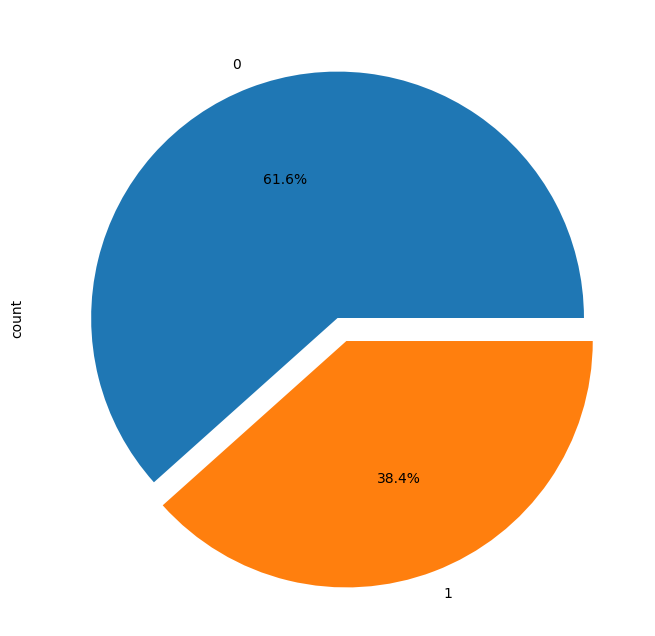

In [13]:
y.value_counts().plot.pie(explode=[0, 0.1], figsize=(8, 8), autopct='%1.1f%%');

Обърнете внимане, че класовете не са 50/50.

Нека си отделим тренировъчен модел:

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

Ползваме `stratify` за да се уверим, че `y_train` и `y_test` запазват пропорциите:

In [15]:
y_train.mean()

np.float64(0.38323353293413176)

In [16]:
y_test.mean()

np.float64(0.38565022421524664)

Ще се пробваме първоначално с логичстична регресия:

In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X_train, y_train)
print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.7125748502994012
test score:  0.6860986547085202


Виждаме, че моделът се справя учудващо добре с толкова малко данни и не се пренагажда. Все пак, има голямо поле за подобрение.

Да пробваме и с Random Forest:

In [18]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=0).fit(X_train, y_train)
print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.9610778443113772
test score:  0.7130044843049327


Тук вече има голямо пренагаждане. Може да се опитаме да регуларизираме. ПНека да демонстрираме Grid Search:

In [19]:
from sklearn.model_selection import GridSearchCV

search = GridSearchCV(model, {'n_estimators': [10, 30, 50, 70, 100],
                              'max_depth': [2, 4, 6, 8, 10, 12, 15]})
search.fit(X, y)

pd.DataFrame(search.cv_results_)[['rank_test_score', 'mean_test_score', 'params']].sort_values(by='rank_test_score').head(10)

,rank_test_score,mean_test_score,params
7,1,0.728498,"{'max_depth': 4, 'n_estimators': 50}"
12,2,0.728473,"{'max_depth': 6, 'n_estimators': 50}"
8,3,0.727374,"{'max_depth': 4, 'n_estimators': 70}"
14,4,0.727368,"{'max_depth': 6, 'n_estimators': 100}"
6,5,0.723997,"{'max_depth': 4, 'n_estimators': 30}"
13,6,0.722874,"{'max_depth': 6, 'n_estimators': 70}"
9,7,0.719515,"{'max_depth': 4, 'n_estimators': 100}"
11,8,0.715015,"{'max_depth': 6, 'n_estimators': 30}"
19,9,0.713897,"{'max_depth': 8, 'n_estimators': 100}"
17,10,0.713891,"{'max_depth': 8, 'n_estimators': 50}"


Изглежда, че няма да видим много драматчина разлика.

Мжоем да разгледаме по-подробно резултатите:

In [20]:
pd.DataFrame(search.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,0.116501,0.011284,0.008022,0.002295,4,50,"{'max_depth': 4, 'n_estimators': 50}",0.636872,0.696629,0.752809,0.786517,0.769663,0.728498,0.054887,1
12,0.140343,0.003298,0.010548,0.000581,6,50,"{'max_depth': 6, 'n_estimators': 50}",0.659218,0.696629,0.752809,0.786517,0.747191,0.728473,0.044993,2
8,0.156786,0.011354,0.008399,0.002747,4,70,"{'max_depth': 4, 'n_estimators': 70}",0.636872,0.696629,0.752809,0.780899,0.769663,0.727374,0.053733,3
14,0.252689,0.020625,0.013219,0.002640,6,100,"{'max_depth': 6, 'n_estimators': 100}",0.642458,0.696629,0.752809,0.797753,0.747191,0.727368,0.053195,4
6,0.073836,0.013821,0.006733,0.001271,4,30,"{'max_depth': 4, 'n_estimators': 30}",0.642458,0.685393,0.752809,0.775281,0.764045,0.723997,0.051386,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,0.207808,0.010715,0.011152,0.002372,15,70,"{'max_depth': 15, 'n_estimators': 70}",0.653631,0.651685,0.702247,0.735955,0.662921,0.681288,0.032883,31
34,0.303175,0.024294,0.014376,0.003228,15,100,"{'max_depth': 15, 'n_estimators': 100}",0.648045,0.640449,0.691011,0.730337,0.685393,0.679047,0.032450,32
32,0.172546,0.007752,0.010089,0.002647,15,50,"{'max_depth': 15, 'n_estimators': 50}",0.659218,0.634831,0.679775,0.730337,0.674157,0.675664,0.031452,33
25,0.036928,0.005140,0.006100,0.000944,12,10,"{'max_depth': 12, 'n_estimators': 10}",0.636872,0.646067,0.691011,0.702247,0.691011,0.673442,0.026585,34


Нека тренираме модел с най-добрите параметри:

In [22]:
model = RandomForestClassifier(max_depth=6, n_estimators=100, random_state=0).fit(X_train, y_train)
print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.7829341317365269
test score:  0.7130044843049327


Това е малко по-добре, но като цяло беше безсмислено упражнение. Да продължим напред!

Да се върнем на данните.

Каква според вас е следващата стъпка?

# Разглеждане на данните 

Нека погледнем какви характеристики не ползваме:

| Variable       | Definition                                   | Key                                              |
| :------------- | :------------------------------------------- | :----------------------------------------------- |
| **Survived**   | Survival                                     | 0 = No, 1 = Yes                                  |
| Name           | Name of the passenger                        |                                                  |
| **Pclass**     | Ticket class                                 | 1 = 1st, 2 = 2nd, 3 = 3rd                        |
| Sex            | Sex                                          |                                                  |
| **Age**        | Age in years                                 |                                                  |
| **SibSp**      | # of siblings / spouses aboard the Titanic   |                                                  |
| **Parch**      | # of parents / children aboard the Titanic   |                                                  |
| Ticket         | Ticket number                                |                                                  |
| **Fare**       | Passenger fare                               |                                                  |
| Cabin          | Cabin number                                 |                                                  |
| Embarked       | Port of Embarkation                          | C = Cherbourg, Q = Queenstown, S = Southampton   |

Използваните характеристики са в **удебелен фрифт**.

`Sex` е много интересна характеристика. Вероятно политиката е била "първо жените и децата". Нека да видим дали има корелация между пола и това дали са оцелели:

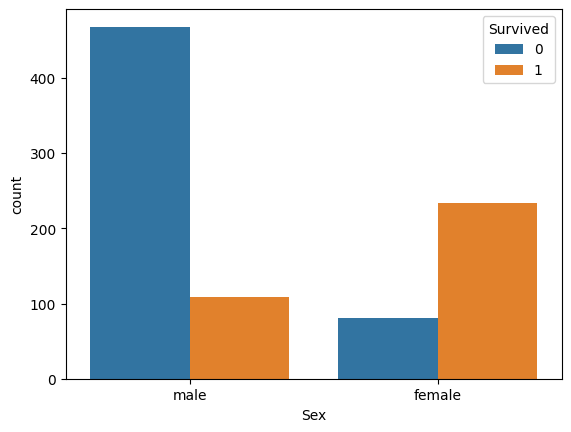

In [28]:
sns.countplot(x='Sex', hue='Survived', data=data);

Определено има нещо тук.

Казахме "първо жените и децата". Нека да видим и как изглежда това с възрастта:

За да е по-лесно ще ги групираме в групи от 5 (0–5, 5-10, 10-15, и т.н.):

In [29]:
ages = original[['Survived', 'Age']]
ages = ages[~ages.Age.isnull()]
ages.Age = ages.Age.apply(lambda x: (x // 5) * 5)

Нека да изчислим успеваемостта във всяка възрастова група от по две години:

In [30]:
ages.groupby('Age').mean()

,Survived
Age,
0.0,0.675000
5.0,0.500000
10.0,0.437500
15.0,0.395349
20.0,0.342105
...,...
55.0,0.375000
60.0,0.400000
65.0,0.000000


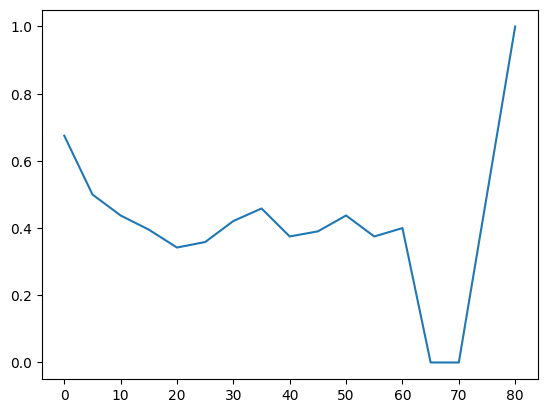

In [31]:
plt.plot(ages.groupby('Age').mean());

Май се наблюдава някаква тенденция, но защо графиката скача към 1.0 при 80?

In [32]:
original[original.Age >= 70][['Survived', 'Name', 'Age']].sort_values(by='Age', ascending=False)

,Survived,Name,Age
PassengerId,,,
631,1,"Barkworth, Mr. Algernon Henry Wilson",80.0
852,0,"Svensson, Mr. Johan",74.0
97,0,"Goldschmidt, Mr. George B",71.0
494,0,"Artagaveytia, Mr. Ramon",71.0
117,0,"Connors, Mr. Patrick",70.5
673,0,"Mitchell, Mr. Henry Michael",70.0
746,0,"Crosby, Capt. Edward Gifford",70.0


Аха – outlier! Най-възрастния пътник е оцелял. Интересно.

Я да видим как изглеждат нещата в `Pclass`:

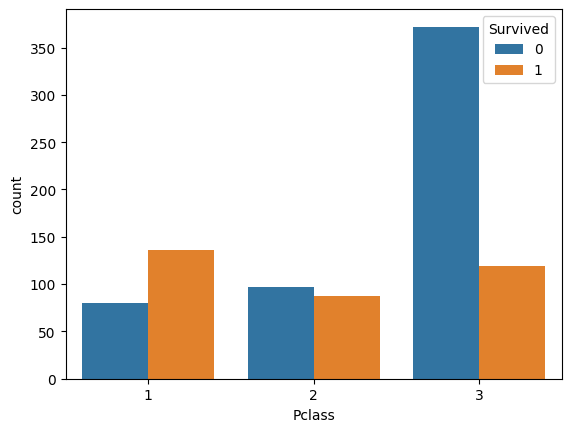

In [33]:
sns.countplot(x='Pclass', hue='Survived', data=original);

Явно това да си богат помага – пътниците от първа класа имат много по-голям шанс да оцелят от тези в трета.

Полезна информация, нека си вземем бележка.

Нека съпоставим това и с пола:

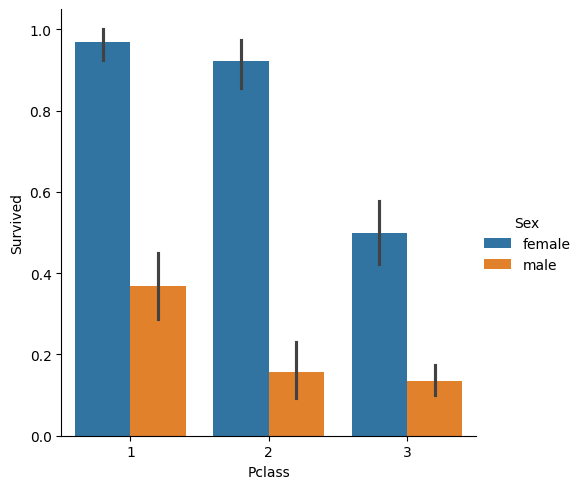

In [38]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=original, kind="bar");

Жените от първа класа имат шанс да оцелеят почти $1.0$!

Да видим дали има нещо интересно в `Embarked`.

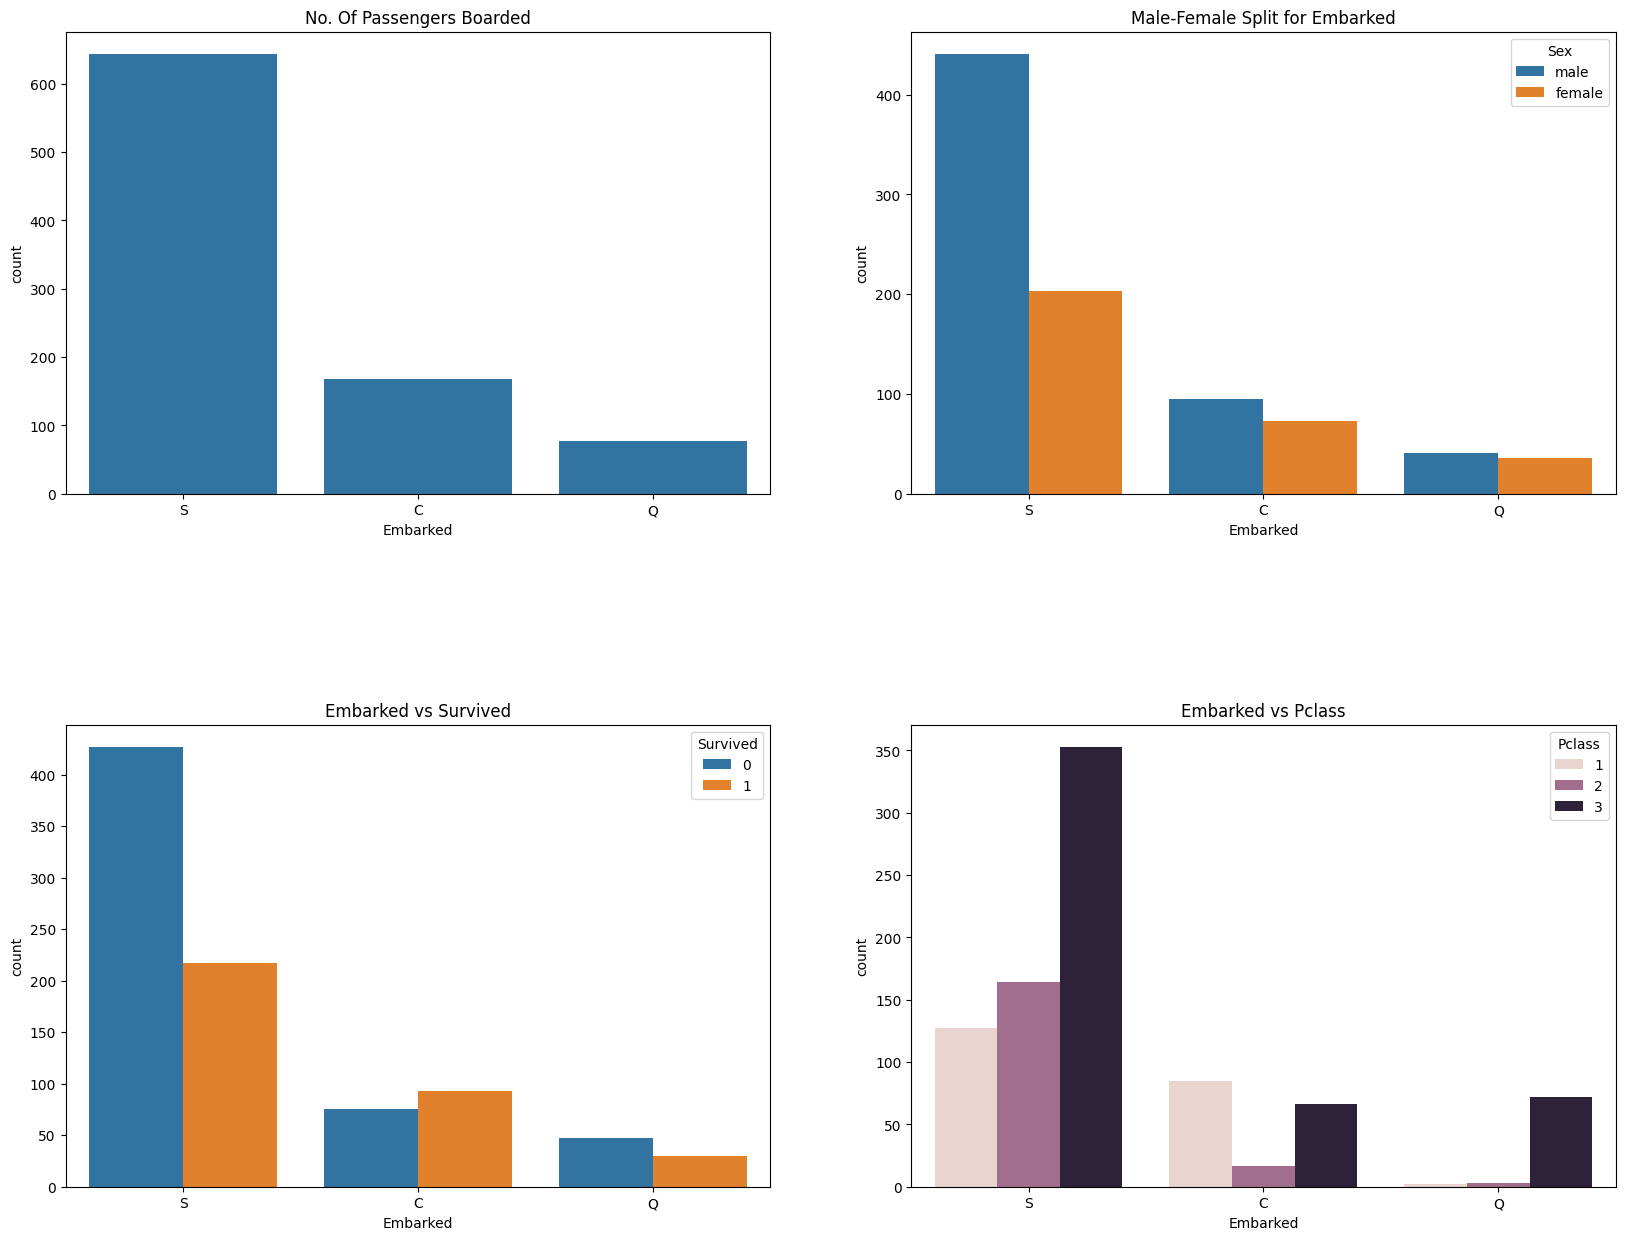

In [40]:
f, ax = plt.subplots(2, 2, figsize=(20,15))

sns.countplot(x='Embarked', data=original, ax=ax[0,0])
ax[0, 0].set_title('No. Of Passengers Boarded')

sns.countplot(x='Embarked', hue='Sex', data=original, ax=ax[0,1])
ax[0, 1].set_title('Male-Female Split for Embarked')

sns.countplot(x='Embarked', hue='Survived', data=original, ax=ax[1,0])
ax[1, 0].set_title('Embarked vs Survived')

sns.countplot(x='Embarked', hue='Pclass', data=original, ax=ax[1,1])
ax[1, 1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Виждамe, че хората качили се в Cherbourg имат по-добри шансове за оцеляване. Но ако се загледаме по-внимателно, ще забележим, че там са се качили най-много хора от първа класа. Т.е., това същестува корелация между двете. Може би това не е толкова интересно, но може да го пробваме.

Да разгледаме `Parch` и `SibSp`.

`SibSp` съдържа броя братя, сестри и половинки.

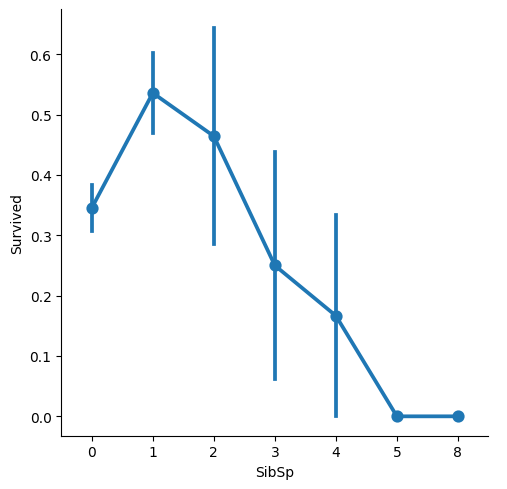

In [47]:
sns.catplot(x='SibSp', y='Survived', data=original, kind='point');

Вижда се, че хората пътуващи с роднини имат по-добри шансове. В това има логика, понеже всеки може да се опита да спаси роднините си преди да спаси себе си.

Да видим `Parch` (родители + деца):

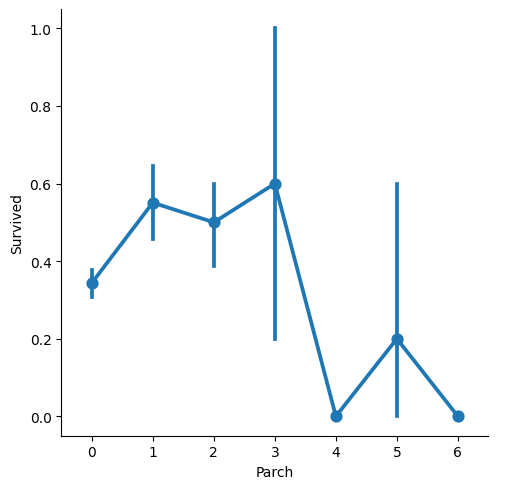

In [48]:
sns.catplot(x='Parch', y='Survived', data=original, kind='point');

Тук има нещо подобно. Дали няма смисъл от нова характеристика – family size?

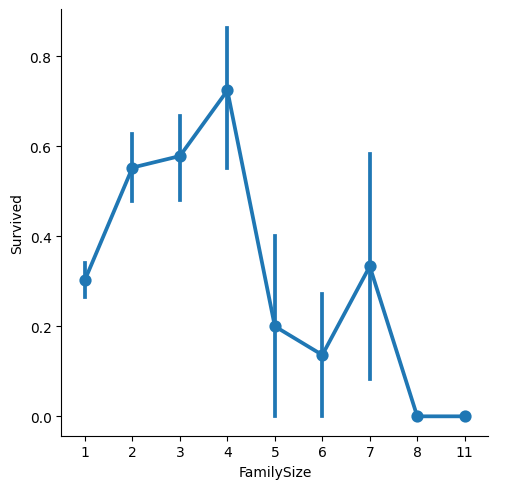

In [50]:
data = original.copy()
data['FamilySize'] = data['Parch'] + data['SibSp'] + 1
sns.catplot(x='FamilySize', y='Survived', data=data, kind='point');

Със сигурност виждаме, че хората пътували сами имат сериозно по-малък шанс от малки семейства (2 - 4). Има някаква аномалия покрай 7.

In [51]:
data[data.FamilySize == 7].sort_values(by='Name')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
PassengerId,,,,,,,,,,,,
851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S,7
814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S,7
120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S,7
69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S,7
542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.2750,NaN,S,7
543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.2750,NaN,S,7
14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S,7
611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S,7
183,0,3,"Asplund, Master. Clarence Gustaf Hugo",male,9.0,4,2,347077,31.3875,NaN,S,7


Добре, тук виждаме, че семейство Asplund (шведи?) са имали късмет.

Всъщност, гледайки имената, всички изглеждат скандинавци, но това със сигуроност е произволно (не може да си извадим извода, че всички 7-членни семейства са скандинавци). Вероятно и в сем. Asplund има двама с други фамилии и затова не излизат тук.

До момента:

* Видяхме, че `Sex` е много определящ фактор.
* Аналогичен случай с `Age`, макар и не толкова произнесен.
* Класата също носи полезна информация.
* Размера на семейството също дава предимвство в определени точки.


Някой сеща ли се за друг атрибут, който не сме погледнали?

| Variable  | Definition                                   | Key                                              |
| :-------- | :------------------------------------------- | :----------------------------------------------- |
| Survived  | Survival                                     | 0 = No, 1 = Yes                                  |
| Name      | Name of the passenger                        |                                                  |
| Pclass    | Ticket class                                 | 1 = 1st, 2 = 2nd, 3 = 3rd                        |
| Sex       | Sex                                          |                                                  |
| Age       | Age in years                                 |                                                  |
| SibSp     | # of siblings / spouses aboard the Titanic   |                                                  |
| Parch     | # of parents / children aboard the Titanic   |                                                  |
| Ticket    | Ticket number                                |                                                  |
| Fare      | Passenger fare                               |                                                  |
| Cabin     | Cabin number                                 |                                                  |
| Embarked  | Port of Embarkation                          | C = Cherbourg, Q = Queenstown, S = Southampton   |



Да видим какво има в името:

In [52]:
original[['Name']].head(10)

,Name
PassengerId,
1,"Braund, Mr. Owen Harris"
2,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
3,"Heikkinen, Miss. Laina"
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
5,"Allen, Mr. William Henry"
6,"Moran, Mr. James"
7,"McCarthy, Mr. Timothy J"
8,"Palsson, Master. Gosta Leonard"
9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"


Някой вижда ли нещо?

Тази титла може би е интересна. Дали не може да съобразим нещо от нея?

In [53]:
data['Title'] = data.Name.str.extract('([A-Za-z]+)\.', expand=False)

pd.options.display.max_rows = 20
data['Title'].value_counts()

<>:1: SyntaxWarning: "\." is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\."? A raw string is also an option.
<>:1: SyntaxWarning: "\." is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\."? A raw string is also an option.
C:\Users\Berbatova\AppData\Local\Temp\ipykernel_11836\3569275806.py:1: SyntaxWarning: "\." is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\."? A raw string is also an option.
  data['Title'] = data.Name.str.extract('([A-Za-z]+)\.', expand=False)


Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

Тук наистина има нещо интересно. Някои от тези титли се повтарят, а други да доста рядки за да има значение. Ще ги обраборим малко, но преди това, искам да видя дали докторите и свещенниците са имали по-голям шанс да оцелеят от останалите:

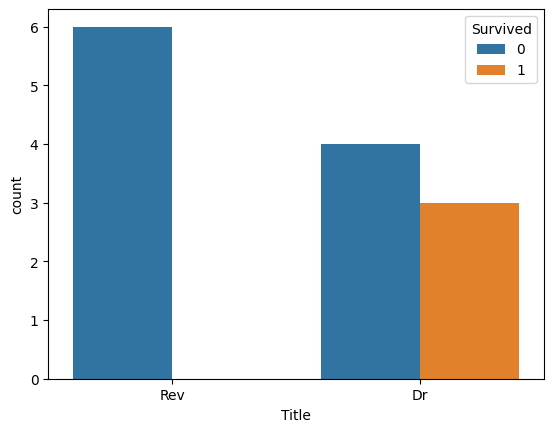

In [55]:
sns.countplot(x='Title', hue='Survived', data=data[data.Title.isin(['Dr', 'Rev'])]);

Явно всички вярващи са се срещнали с техния бог тази вечер. Данните са твърде малки и може да ги игнорираме. Нека сведем титлите до пет вида.

Нека да посъберем титлите. Първо, малко френски (и правописни грешки):

In [56]:
data.loc[data.Title == 'Mlle', 'Title'] = 'Miss'
data.loc[data.Title == 'Mme', 'Title']  = 'Mrs'
data.loc[data.Title == 'Ms', 'Title']   = 'Miss'

In [57]:
data.Title.value_counts()

Title
Mr          517
Miss        185
Mrs         126
Master       40
Dr            7
Rev           6
Col           2
Major         2
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

Сега да махнем и останалите:

In [58]:
rare_titles = ['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Don', 'Jonkheer', 'Capt', 'Lady', 'Sir']
data.Title = data.Title.replace(rare_titles, 'Rare')
data.Title.value_counts()

Title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: count, dtype: int64

Дали в титлата има полезна информация?

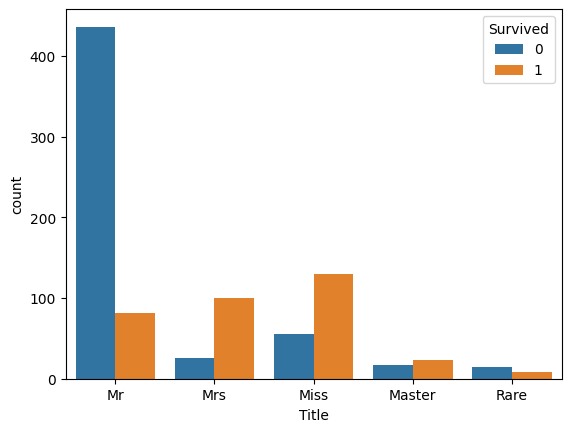

In [60]:
sns.countplot(x='Title', hue='Survived', data=data);

Идея – дали не може да ползваме титлата да си попълним възрастта?

In [61]:
age_by_title = data.groupby('Title').Age.mean()
age_by_title

Title
Master     4.574167
Miss      21.845638
Mr        32.368090
Mrs       35.788991
Rare      45.545455
Name: Age, dtype: float64

Това изглежда подходящо!

# Feature Engineering

Разгледахме данните достатъчно. Нека започнем начисто и да си попълним данните с новите характеристики, които открихме.

Оригиналните данни бяха в `original`. Нека попълним титлите отново.

In [63]:
data = original.copy()

data['Title'] = data.Name.str.extract('([A-Za-z]+)\\.', expand=False)
data.loc[data.Title == 'Mlle', 'Title'] = 'Miss'
data.loc[data.Title == 'Mme', 'Title']  = 'Mrs'
data.loc[data.Title == 'Ms', 'Title']   = 'Miss'

rare_titles = ['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Don', 'Jonkheer', 'Capt', 'Lady', 'Sir']
data.Title = data.Title.replace(rare_titles, 'Rare')

След това нека попълним липсващите възрасти:

In [64]:
data.loc[data.Age.isnull() & (data.Title == 'Mr'), 'Age'] = age_by_title['Mr']
data.loc[data.Age.isnull() & (data.Title == 'Mrs'), 'Age'] = age_by_title['Mrs']
data.loc[data.Age.isnull() & (data.Title == 'Miss'), 'Age'] = age_by_title['Miss']
data.loc[data.Age.isnull() & (data.Title == 'Master'), 'Age'] = age_by_title['Master']
data.loc[data.Age.isnull() & (data.Title == 'Rare'), 'Age'] = age_by_title['Rare']

Да видим какво се получи:

In [65]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
Title         0
dtype: int64

Дали не сме омазали нещо?

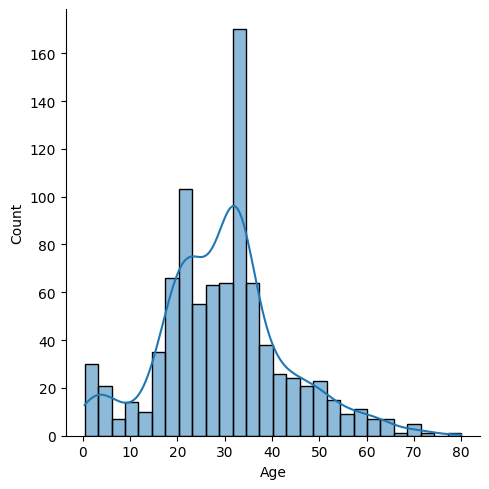

In [71]:
sns.displot(data.Age, kde=True);

Сякаш не сме.

Нека попълним двете липсващи `Embarked` с `S`, който е най-популярния.

In [72]:
data.Embarked = data.Embarked.fillna('S')
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
Title         0
dtype: int64

Остана само `Cabin`, който решихме, че не ни интересува:

In [73]:
data = data.drop('Cabin', axis=1)

Нека си добавим и `FamilySize`:

In [74]:
data['FamilySize'] = data.Parch + data.SibSp + 1
data = data.drop(['Parch', 'SibSp'], axis=1)

Готови сме!

In [75]:
data

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Title,FamilySize
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,A/5 21171,7.2500,S,Mr,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,PC 17599,71.2833,C,Mrs,2
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,STON/O2. 3101282,7.9250,S,Miss,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,113803,53.1000,S,Mrs,2
5,0,3,"Allen, Mr. William Henry",male,35.000000,373450,8.0500,S,Mr,1
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,211536,13.0000,S,Rare,1
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,112053,30.0000,S,Miss,1
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.845638,W./C. 6607,23.4500,S,Miss,4


Последна проверка:

In [76]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
Ticket        0
Fare          0
Embarked      0
Title         0
FamilySize    0
dtype: int64

In [77]:
data.describe()

,Survived,Pclass,Age,Fare,FamilySize
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.759451,32.204208,1.904602
std,0.486592,0.836071,13.278693,49.693429,1.613459
min,0.000000,1.000000,0.420000,0.000000,1.000000
25%,0.000000,2.000000,21.845638,7.910400,1.000000
50%,0.000000,3.000000,30.000000,14.454200,1.000000
75%,1.000000,3.000000,35.788991,31.000000,2.000000
max,1.000000,3.000000,80.000000,512.329200,11.000000


Всичко изглежда наред!

Нека се пробваме да потренираме модели! Но първо да си запишем новите данни някъде:

In [78]:
transformed = data.copy()

# Логистична регресия

Нека се пробваме с логистична регресия. Да припомним, моделът е същия като линейната, само че минава през сигмоид:

$$S(x) = \frac{1}{1 + e^{-x}}$$

Графиката на функцията изглежда така:

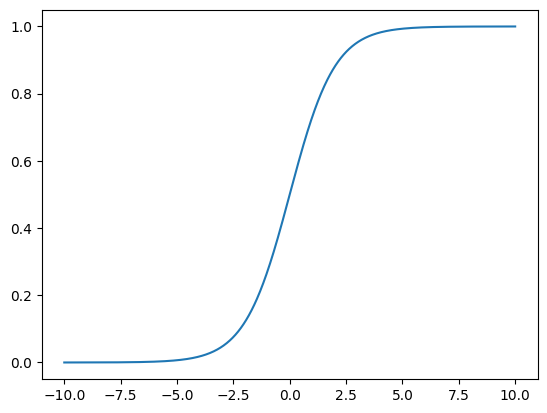

In [79]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

interval = np.linspace(-10, 10, num=1000)
plt.plot(interval, sigmoid(interval));

И формулата на модела е:

$$y = S(a_0 + a_1x_1 + a_2x_2 + \ldots + a_nx_n)$$

Където:

* $a_i$ е теглото на определена характеристика (и $a_0$ е константа, открита от модела)
* $x_i$ е $i$-тата характеристика

Понеже това е линеен модел, трябва да обработим малко данните да стигнем до числа.

In [80]:
transformed.head(6)

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Title,FamilySize
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.00000,A/5 21171,7.2500,S,Mr,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,PC 17599,71.2833,C,Mrs,2
3,1,3,"Heikkinen, Miss. Laina",female,26.00000,STON/O2. 3101282,7.9250,S,Miss,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,113803,53.1000,S,Mrs,2
5,0,3,"Allen, Mr. William Henry",male,35.00000,373450,8.0500,S,Mr,1
6,0,3,"Moran, Mr. James",male,32.36809,330877,8.4583,Q,Mr,1


Ще преработим `Sex`, `Title` и `Embarked` по "бебешкия" начин (без да ползваме one-hot).

In [82]:
data = transformed.copy()
data['IsMale']    = (data.Sex == 'male').astype(float)
data['IsFemale']  = (data.Sex == 'female').astype(float)
data['IsMr']      = (data.Title == 'Mr').astype(float)
data['IsMrs']     = (data.Title == 'Mrs').astype(float)
data['IsMiss']    = (data.Title == 'Miss').astype(float)
data['IsMaster']  = (data.Title == 'Master').astype(float)
data['IsRare']    = (data.Title == 'Rare').astype(float)
data['EmbarkedC'] = (data.Embarked == 'C').astype(float)
data['EmbarkedQ'] = (data.Embarked == 'Q').astype(float)
data['EmbarkedS'] = (data.Embarked == 'S').astype(float)

data = data.drop(['Sex', 'Embarked', 'Title'], axis=1)

In [83]:
data.head(10)

,Survived,Pclass,Name,Age,Ticket,Fare,FamilySize,IsMale,IsFemale,IsMr,IsMrs,IsMiss,IsMaster,IsRare,EmbarkedC,EmbarkedQ,EmbarkedS
PassengerId,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.00000,A/5 21171,7.2500,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.00000,PC 17599,71.2833,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,3,"Heikkinen, Miss. Laina",26.00000,STON/O2. 3101282,7.9250,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.00000,113803,53.1000,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0,3,"Allen, Mr. William Henry",35.00000,373450,8.0500,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0,3,"Moran, Mr. James",32.36809,330877,8.4583,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0,1,"McCarthy, Mr. Timothy J",54.00000,17463,51.8625,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0,3,"Palsson, Master. Gosta Leonard",2.00000,349909,21.0750,5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.00000,347742,11.1333,3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


Ще изрежем и другите колони, които не ни интересуват:

In [84]:
data = data.drop(['Name', 'Ticket', 'Fare'], axis=1)
data.head(5)

,Survived,Pclass,Age,FamilySize,IsMale,IsFemale,IsMr,IsMrs,IsMiss,IsMaster,IsRare,EmbarkedC,EmbarkedQ,EmbarkedS
PassengerId,,,,,,,,,,,,,,
1,0,3,22.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,1,38.0,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,3,26.0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1,1,35.0,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0,3,35.0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Да приготвим тренировъчно и тестово множество:

In [86]:
X = data.drop('Survived', axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [87]:
X.head()

,Pclass,Age,FamilySize,IsMale,IsFemale,IsMr,IsMrs,IsMiss,IsMaster,IsRare,EmbarkedC,EmbarkedQ,EmbarkedS
PassengerId,,,,,,,,,,,,,
1,3,22.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,38.0,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,26.0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1,35.0,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5,3,35.0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [88]:
y.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

Да тренираме модел!

Drumroll...

In [89]:
model = LogisticRegression()
model.fit(X_train, y_train)

print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.8413173652694611
test score:  0.8161434977578476


c:\Users\Berbatova\anaconda3\envs\ml_course\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Вдигнахме резултата с около 10%! Това въобще не е за подценяване. Нека да видим какви тегла откри модела.

In [92]:
def logistic_regression_features(X, model):
    plt.figure(figsize=(12,8))
    barplot = sns.barplot(x=X.columns, y=model.coef_[0], orient='vertical', palette='colorblind')
    plt.setp(barplot.get_xticklabels(), rotation=90)
    plt.grid(True)

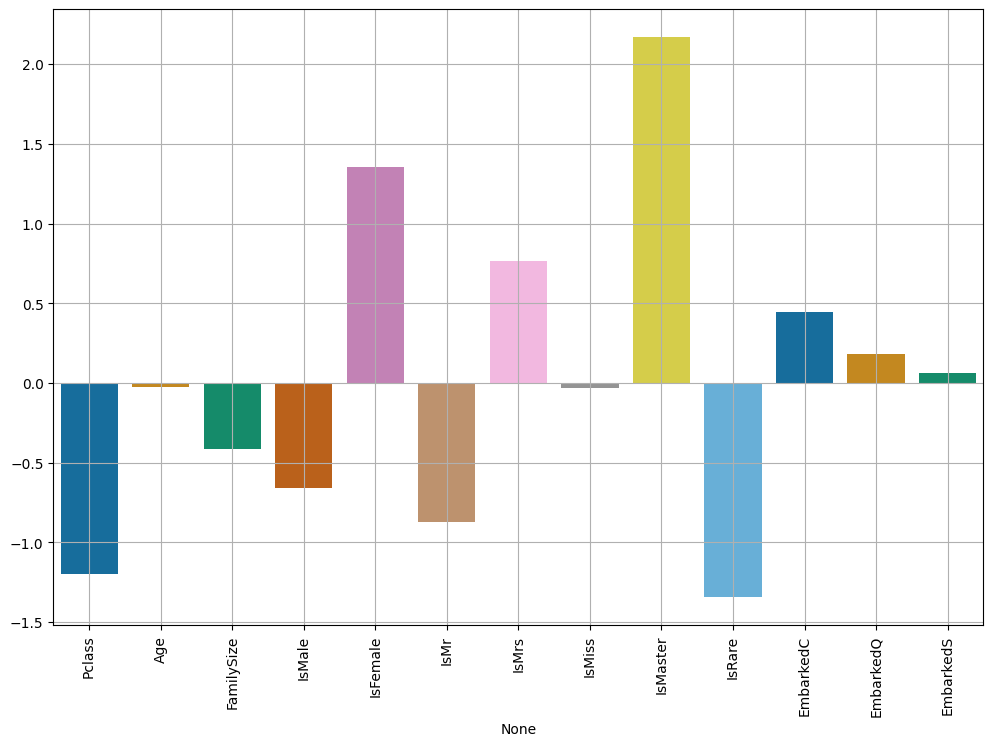

In [93]:
logistic_regression_features(X, model)

Много любопитно. Съвпада с интуицията ни. Обърнете внимане, че колкото е по-голямо число е класата, толкова по-малък е шанса за оцеляване. Аналогично и за възрастта.

# Линейни модели и непрекъснати характеристики

Линейните модели не се оправят много добре с непрекъснати характеристики, когато корелацията е линейна. Ако първа класа има точно 3 пъти по-голям шанс за оцеляване от трета, това би било ОК, но ситуацията едва ли е такава. Има аналогичен случай и за възрастта.

Нека първо да пробваме да one-hot encode-нем класата.

In [94]:
data['Class1'] = (data.Pclass == 1).astype(float)
data['Class2'] = (data.Pclass == 2).astype(float)
data['Class3'] = (data.Pclass == 3).astype(float)
data = data.drop('Pclass', axis=1)
data.head()

,Survived,Age,FamilySize,IsMale,IsFemale,IsMr,IsMrs,IsMiss,IsMaster,IsRare,EmbarkedC,EmbarkedQ,EmbarkedS,Class1,Class2,Class3
PassengerId,,,,,,,,,,,,,,,,
1,0,22.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1,38.0,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1,26.0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1,35.0,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
5,0,35.0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


Да тренираме пак:

In [95]:
X = data.drop('Survived', axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

model = LogisticRegression()
model.fit(X_train, y_train)

print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.8413173652694611
test score:  0.8161434977578476


c:\Users\Berbatova\anaconda3\envs\ml_course\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Успяхме да вдигнем точността. Да видим дали бяхме прави?

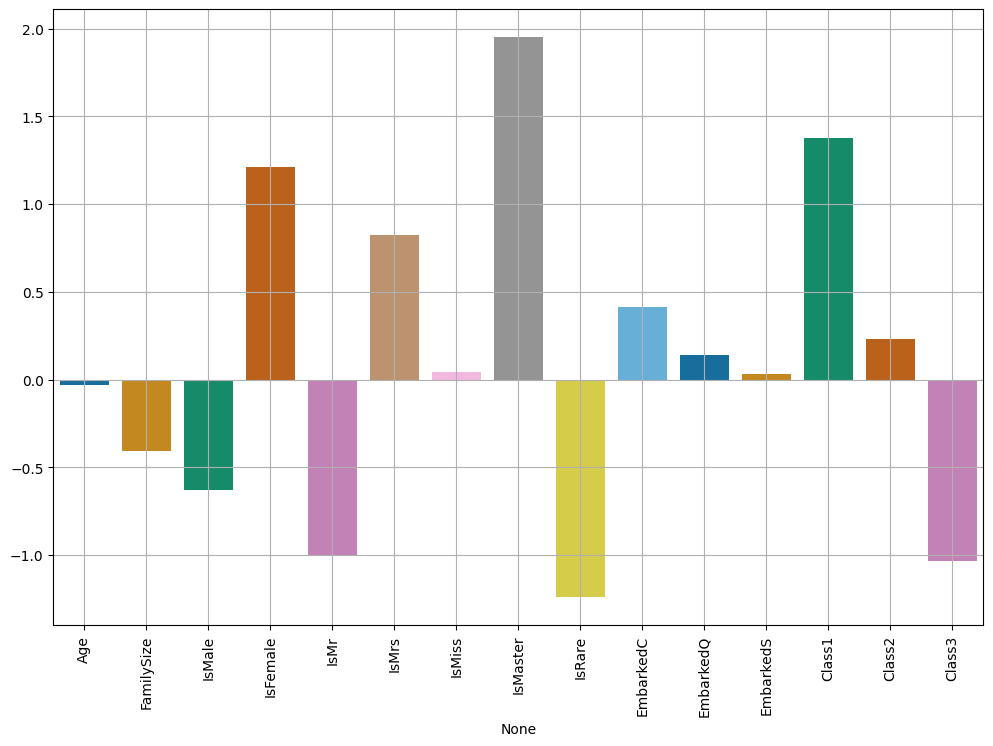

In [96]:
logistic_regression_features(X, model)

Не си личи твърде ясно от графиката, но не са съвсем на една права:

In [97]:
coefficients = model.coef_[0]
(coefficients[-2] - coefficients[-1], coefficients[-3] - coefficients[-2])

(np.float64(1.2652064874692164), np.float64(1.1448842202996914))

Може да пробваме да приложим тази идея върху Age – видяхме по-рано, че връзката между вързастта и оцеляваемостта не е съвсем линейна. Може да превърнем `Age` от непрекъснат атрибут в категория и после да я one-hot encode-нем.

Това се нарича binning.

Да пробваме да ги разделим на две категори, спрямо това дали имат 18 или не:

In [98]:
data['IsChild'] = (data.Age < 18).astype(float)
data['IsAdult'] = (18 <= data.Age).astype(float)

data = data.drop('Age', axis=1)

In [99]:
data.head()

,Survived,FamilySize,IsMale,IsFemale,IsMr,IsMrs,IsMiss,IsMaster,IsRare,EmbarkedC,EmbarkedQ,EmbarkedS,Class1,Class2,Class3,IsChild,IsAdult
PassengerId,,,,,,,,,,,,,,,,,
1,0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,1,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,1,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
5,0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


Тренираме модел:

In [100]:
X = data.drop('Survived', axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

model = LogisticRegression()
model.fit(X_train, y_train)

print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.8413173652694611
test score:  0.8161434977578476


Имаме подобрение! Нека да видим как изглеждат новите тегла:

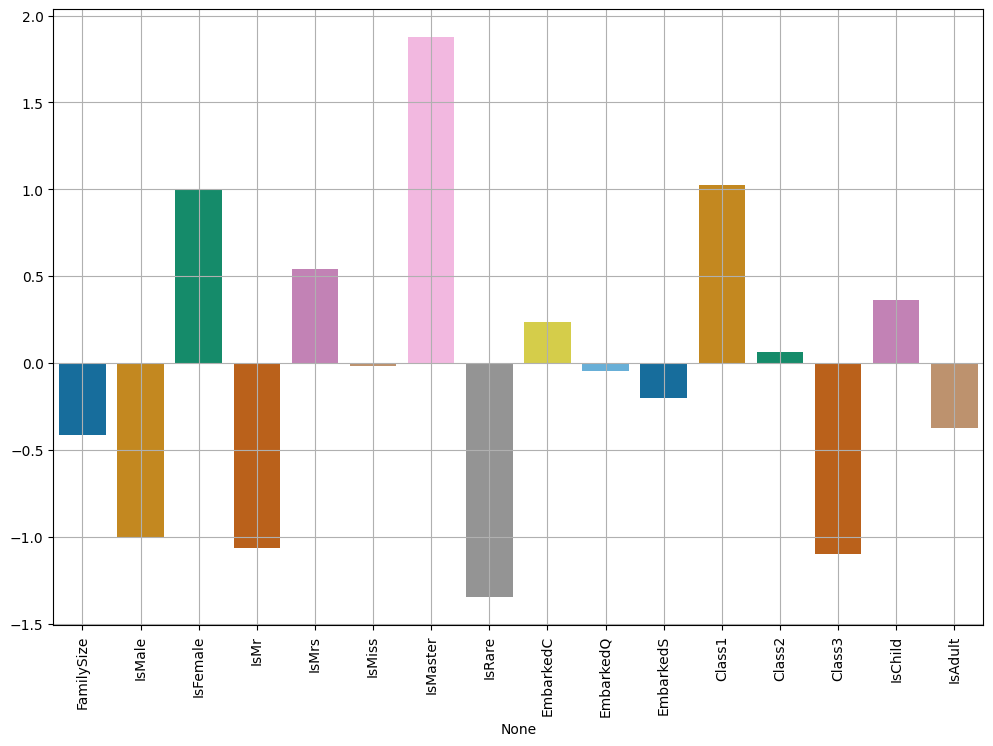

In [101]:
logistic_regression_features(X, model)

Нека да пробваме да bin-нем и размера на семейството.

In [102]:
data['IsAlone']       = (data.FamilySize == 1).astype(float)
data['IsSmallFamily'] = ((2 <= data.FamilySize) & (data.FamilySize < 5)).astype(float)
data['IsLargeFamily'] = (5 <= data.FamilySize).astype(float)

data = data.drop('FamilySize', axis=1)

In [103]:
data.head()

,Survived,IsMale,IsFemale,IsMr,IsMrs,IsMiss,IsMaster,IsRare,EmbarkedC,EmbarkedQ,EmbarkedS,Class1,Class2,Class3,IsChild,IsAdult,IsAlone,IsSmallFamily,IsLargeFamily
PassengerId,,,,,,,,,,,,,,,,,,,
1,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [104]:
X = data.drop('Survived', axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

model = LogisticRegression()
model.fit(X_train, y_train)

print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.8398203592814372
test score:  0.8161434977578476


Нямаше никаква промяна. Любопитно.

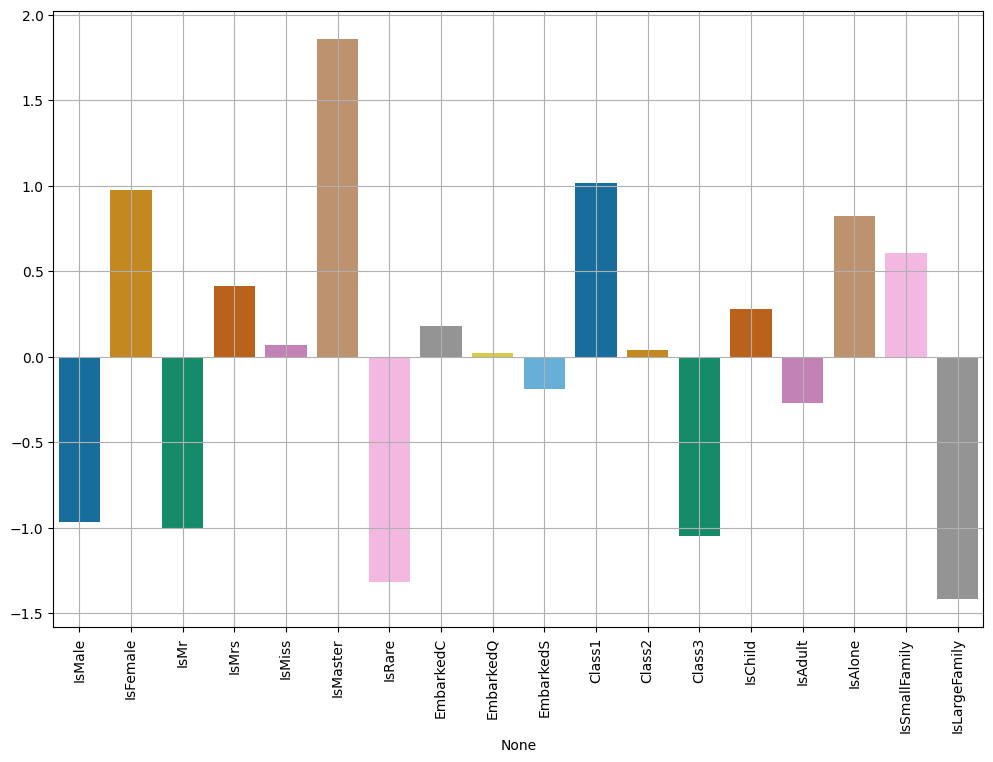

In [105]:
logistic_regression_features(X, model)

Интересно е, че `IsAlone` има по-голямо тегло от `IsSmallFamily`, което не съвпада с първоначалния ни анализ. Може би моделът се пренагажда. Но да спрем до тук.

Ще пробваме само с малко регуларизация.

In [107]:
for c in [0.001, 0.003, 0.006, 0.1, 0.3, 0.6, 1.0, 3.0, 6.0]:
    model = LogisticRegression(C=c)
    model.fit(X_train, y_train)
    
    print("C={:f} train: {:f} test: {:f}".format(c, model.score(X_train, y_train), model.score(X_test, y_test)))

C=0.001000 train: 0.616766 test: 0.614350
C=0.003000 train: 0.745509 test: 0.744395
C=0.006000 train: 0.799401 test: 0.798206
C=0.100000 train: 0.835329 test: 0.816143
C=0.300000 train: 0.841317 test: 0.820628
C=0.600000 train: 0.839820 test: 0.816143
C=1.000000 train: 0.839820 test: 0.816143
C=3.000000 train: 0.839820 test: 0.816143
C=6.000000 train: 0.839820 test: 0.816143


Явно стойността по подразбиране `C=1` е достатъчно добра.

# Random Forest

Веднъж видяли резултатите с логистична регресия, може да пробваме друг алгоритъм. Нека се спрем на random forest. Той няма нужда от всичкия този масаж на данни, които приложихме. Но все пак да видим какво ще стане със същите данни:

In [108]:
model = RandomForestClassifier(random_state=0).fit(X_train, y_train)
print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.8473053892215568
test score:  0.8295964125560538


Да пуснем и един grid search по параметри:

In [109]:
search = GridSearchCV(model, {'n_estimators': [10, 30, 50, 70, 100],
                              'max_depth': [2, 4, 6, 8, 10, 12, 15]})
search.fit(X, y)

pd.DataFrame(search.cv_results_)[['rank_test_score', 'mean_test_score', 'params']].sort_values(by='rank_test_score').head(10)

,rank_test_score,mean_test_score,params
9,1,0.834995,"{'max_depth': 4, 'n_estimators': 100}"
7,2,0.834988,"{'max_depth': 4, 'n_estimators': 50}"
8,3,0.833871,"{'max_depth': 4, 'n_estimators': 70}"
6,4,0.830519,"{'max_depth': 4, 'n_estimators': 30}"
12,5,0.824933,"{'max_depth': 6, 'n_estimators': 50}"
11,6,0.822685,"{'max_depth': 6, 'n_estimators': 30}"
5,7,0.822666,"{'max_depth': 4, 'n_estimators': 10}"
13,8,0.821581,"{'max_depth': 6, 'n_estimators': 70}"
14,9,0.820457,"{'max_depth': 6, 'n_estimators': 100}"
31,10,0.820438,"{'max_depth': 15, 'n_estimators': 30}"


Ако вземем най-добрите параметри, получаваме същия резултат на тестовото множество:

In [110]:
model = RandomForestClassifier(random_state=0, n_estimators=70, max_depth=4).fit(X_train, y_train)
print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.8398203592814372
test score:  0.820627802690583


Май нямаше голямо значение.

Да видим какво значение е отдал алгоритъма на характеристиките:

In [111]:
def random_forest_features(model, X):
    importances = model.feature_importances_
    std = np.std([model.feature_importances_ for tree in model.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 10))
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), X.columns, rotation='vertical')
    plt.xlim([-1, X.shape[1]])
    plt.show()

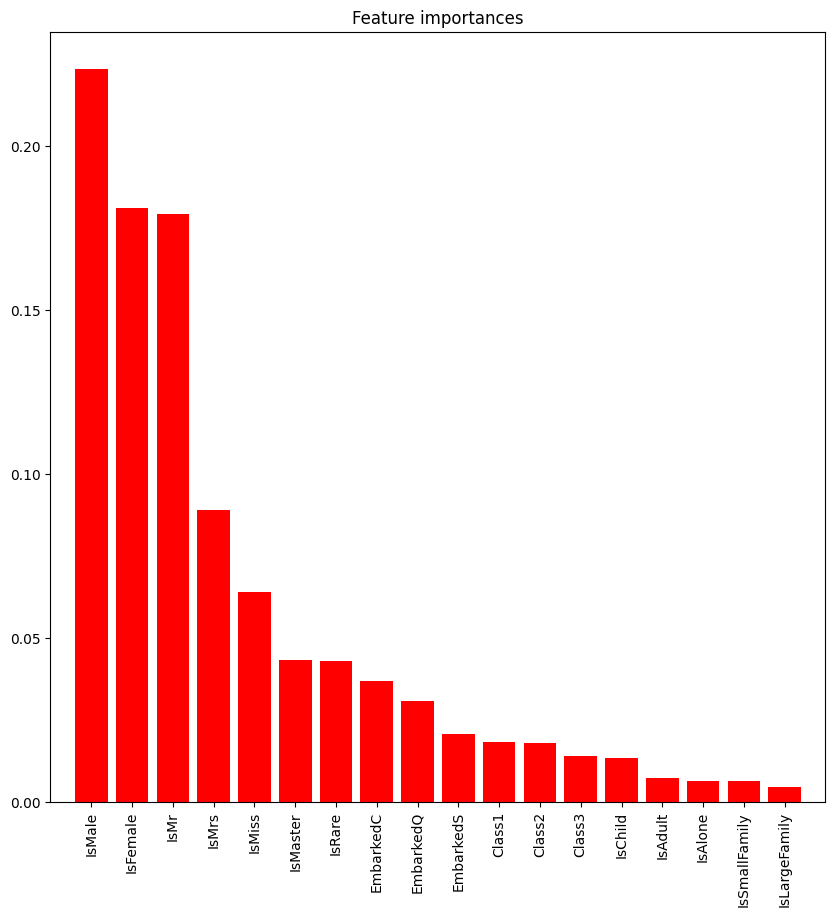

In [112]:
random_forest_features(model, X)

Казахме, че целия този binning е ненужен за RandomForest. Дали няма да се оправи по-добре ако се върнем малко по-назад?

In [113]:
data = transformed.copy()

data['Male'] = (data.Sex == 'male').astype(float)
data['Embarked'] = data.Embarked.apply(lambda x: ['C', 'S', 'Q'].index(x))
data['Title'] = data.Title.apply(lambda x: ['Mr', 'Mrs', 'Miss', 'Master', 'Rare'].index(x))

data = data.drop(['Sex', 'Name', 'Ticket', 'Fare'], axis=1)
data.head()

,Survived,Pclass,Age,Embarked,Title,FamilySize,Male
PassengerId,,,,,,,
1,0,3,22.0,1,0,2,1.0
2,1,1,38.0,0,1,2,0.0
3,1,3,26.0,1,2,1,0.0
4,1,1,35.0,1,1,2,0.0
5,0,3,35.0,1,0,1,1.0


Да тренираме отново:

In [114]:
X = data.drop('Survived', axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.938622754491018
test score:  0.8071748878923767


Тук има overfitting и има шанс да намерим нещо добро ако потърсим подходящи параметри.

In [115]:
search = GridSearchCV(model, {'n_estimators': [10, 30, 50, 70, 100],
                              'max_depth': [2, 4, 6, 8, 10, 12, 15]})
search.fit(X, y)

pd.DataFrame(search.cv_results_)[['rank_test_score', 'mean_test_score', 'params']].sort_values(by='rank_test_score').head(10)

,rank_test_score,mean_test_score,params
7,1,0.833877,"{'max_depth': 4, 'n_estimators': 50}"
9,1,0.833877,"{'max_depth': 4, 'n_estimators': 100}"
8,3,0.832760,"{'max_depth': 4, 'n_estimators': 70}"
6,3,0.832760,"{'max_depth': 4, 'n_estimators': 30}"
5,5,0.832747,"{'max_depth': 4, 'n_estimators': 10}"
11,6,0.830525,"{'max_depth': 6, 'n_estimators': 30}"
12,7,0.830519,"{'max_depth': 6, 'n_estimators': 50}"
13,8,0.830513,"{'max_depth': 6, 'n_estimators': 70}"
14,9,0.828266,"{'max_depth': 6, 'n_estimators': 100}"
10,10,0.827173,"{'max_depth': 6, 'n_estimators': 10}"


In [116]:
model = RandomForestClassifier(random_state=0, max_depth=4, n_estimators=70)
model.fit(X_train, y_train)

print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.8398203592814372
test score:  0.820627802690583


Същия резултат.

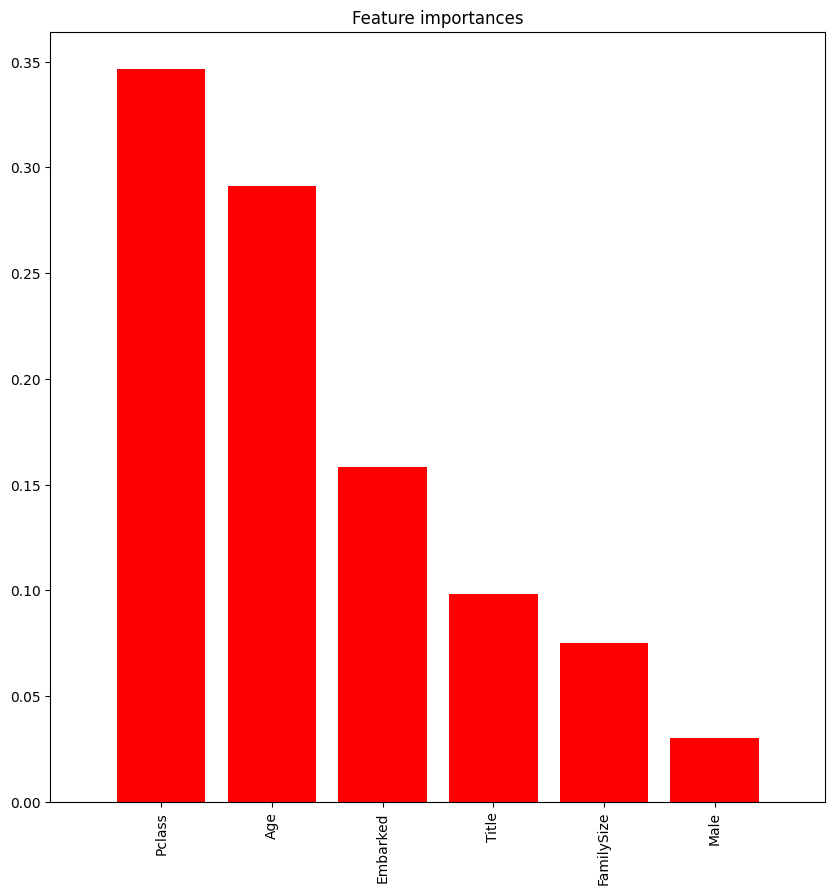

In [117]:
random_forest_features(model, X)

Нека сега да видим как щяхме да се справим с филмът Titanic!

Кой от тези тримата герои ще умре?

Ако поровим в IMDB, може да намерим данните за тях и да си ги трансформираме на ръка:

In [118]:
characters = pd.DataFrame([
    ['Jack Dawson',         3, 19, 1, 0, 1, 1],
    ['Rose DeWitt Bukater', 1, 16, 0, 2, 2, 0],
    ['Caledon Hockley',     1, 29, 0, 0, 2, 1]
], columns=['Name', 'Pclass', 'Age', 'Embarked', 'Title', 'FamilySize', 'Male'])
characters

,Name,Pclass,Age,Embarked,Title,FamilySize,Male
0,Jack Dawson,3,19,1,0,1,1
1,Rose DeWitt Bukater,1,16,0,2,2,0
2,Caledon Hockley,1,29,0,0,2,1


И сега да предвидим:

In [119]:
model.predict(characters.drop('Name', axis=1))

array([0, 1, 0])

2 от 3! 

Нека пробваме submission в Kaggle.

За начало, трябва да вземeм `test.csv` и да го прекараме през всички тези трансформации. 

(За да не се пренаписва код, може да се напишат функции с трасформациите.)

In [121]:
test = pd.read_csv('data/titanic/test.csv', index_col=['PassengerId'])

test['Title'] = test.Name.str.extract('([A-Za-z]+)\\.', expand=False)
test['FamilySize'] = test.Parch + test.SibSp + 1
test['Male'] = (test.Sex == 'male').astype(float)
test['Embarked'] = test.Embarked.apply(lambda x: ['C', 'S', 'Q'].index(x))


test.loc[test.Title == 'Mlle', 'Title'] = 'Miss'
test.loc[test.Title == 'Mme', 'Title']  = 'Mrs'
test.loc[test.Title == 'Ms', 'Title']   = 'Miss'

rare_titles = ['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Don', 'Jonkheer', 'Capt', 'Lady', 'Sir', 'Dona']
test.Title = test.Title.replace(rare_titles, 'Rare')

test.loc[test.Age.isnull() & (test.Title == 'Mr'), 'Age'] = age_by_title['Mr']
test.loc[test.Age.isnull() & (test.Title == 'Mrs'), 'Age'] = age_by_title['Mrs']
test.loc[test.Age.isnull() & (test.Title == 'Miss'), 'Age'] = age_by_title['Miss']
test.loc[test.Age.isnull() & (test.Title == 'Master'), 'Age'] = age_by_title['Master']
test.loc[test.Age.isnull() & (test.Title == 'Rare'), 'Age'] = age_by_title['Rare']

test['Title'] = test.Title.apply(lambda x: ['Mr', 'Mrs', 'Miss', 'Master', 'Rare'].index(x))

test = test.drop(['Sex', 'Name', 'Ticket', 'Fare', 'Cabin', 'Parch', 'SibSp'], axis=1)

test.head()

,Pclass,Age,Embarked,Title,FamilySize,Male
PassengerId,,,,,,
892,3,34.5,2,0,1,1.0
893,3,47.0,1,1,2,0.0
894,2,62.0,2,0,1,1.0
895,3,27.0,1,0,1,1.0
896,3,22.0,1,1,3,0.0


Да генерираме CSV файл:

In [122]:
predictions = model.predict(test)
frame = pd.DataFrame({
    'PassengerId': pd.read_csv('data/titanic/test.csv').PassengerId,
    'Survived': predictions
})
frame = frame.set_index('PassengerId')
frame.to_csv('~/Desktop/predictions.csv')
frame.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
